# Assigment 04: Due 9/30

You can use these imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
import math
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [2]:
N =10000
a = 0
b = 2
def f(x):
    return 2/(4 + x**2)**(3/2)
x = np.linspace(a,b,N)
y = f(x)
fmax = max(y)
x_rand = a + (b - a)*np.random.random(N)
y_rand = np.random.random(N)*fmax

ind_below = np.where(y_rand < f(x_rand))
ind_above = np.where(y_rand >= f(x_rand))

ratio = float(len(ind_below[0])/N)
area = (b-a)*fmax
integral = ratio*area
print('Monte Carlo Approximation: {0}\n'.format(integral))

Monte Carlo Approximation: 0.3547



In [3]:
from scipy import integrate
f1 = lambda x: 2/(4 + x**2)**(3/2)
exact_solution = integrate.quad(f1,a,b)
print('The exact solution is: {0}\n'.format(exact_solution[0]))
def percent_error(approx,exact):
    ans = ((approx-exact)/exact)*100
    return ans
percent_difference = percent_error(integral,exact_solution[0])
print('The percent difference is: {0}%\n'.format(percent_difference))


The exact solution is: 0.3535533905932738

The percent difference is: 0.3243101147473602%



# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

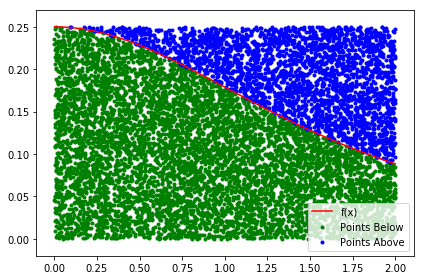

In [4]:
fig = plt.figure('Monte Carlo Integration')
plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green", marker = '.',label='Points Below')
plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout();

# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertianty on the particles. This is the same radio active decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


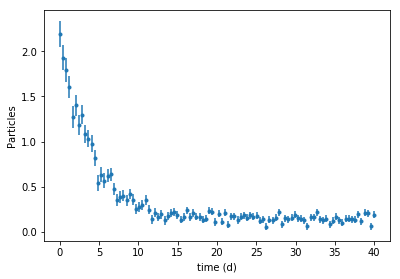

In [5]:
t, N, N_error = np.loadtxt('data/decay_data.txt', unpack=True)
fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(t, N, yerr = N_error, fmt='.')
axes.set_xlabel('time (d)')
axes.set_ylabel('Particles');

# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [6]:
def f_line(t,p0,p1,p2):
    return p0*math.exp(-t/p1) + p2

In [7]:
def get_chi_squared(x, y, sigma, params):
    RR = 0.0
    for i in range(len(x)):
        y_prime = params[0]*math.exp(-x[i]/params[1]) + params[2]
        RR = RR + ( (y[i] - y_prime)/sigma[i])**2
    return RR

In [12]:
num = 10000
init_par = np.array([1.0,1.0,1.0])
par_list, RRs = [init_par], [get_chi_squared(t, N, N_error, init_par)]
my_list = par_list
print(my_list[-1])
for i in range (num):
    test_par = [np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5),np.random.normal(par_list[-1][2],0.5)]
    RR_test = get_chi_squared(t,N,N_error,test_par)
    print(i,test_par)  
    z = (np.random.random() <= (RRs[-1])/RR_test )
    if z:
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])    
            
RR_min = np.amin(RRs)
print(RR_min)
chisq = RR_min
best_i = RRs.index(RR_min)
best_pars = par_list[best_i]
print("best p0 = {0}, best p1 = {1}, best p2 = {2}, chi**2 = {3}".format(best_pars[0], best_pars[1], best_pars[2], RR_min) )



[1. 1. 1.]
0 [0.8835553318763831, 0.9529732744797709, 1.049813728396449]
1 [1.561107547086594, 0.6776524316083596, 1.7140217736223384]
2 [0.9895549327558861, 0.6228500762133754, 1.259676373364587]
3 [1.0226267619924028, 0.9901525088230202, 0.9233859560026748]
4 [1.4868372711883435, 1.1656849088878392, 2.0228355774775575]
5 [1.0997240456631792, 2.113848479282793, 0.455708666643839]
6 [0.511373214027978, 2.390999622596129, 0.32185311432611363]
7 [0.05456738459465804, 2.9186880868418754, -0.3678649242097025]
8 [0.7839486430896295, 2.369122548264293, 0.8645502400163035]
9 [0.116742596566004, 2.2395002024846127, 0.7501257098480523]
10 [-0.48389566349701846, 2.093931532977823, 1.7595393326893054]
11 [1.0536306280468228, 1.6336725227746338, 1.1475794058819382]
12 [1.1711026239239337, 2.143263741657531, 1.6427424620940017]
13 [1.4229003474123605, 2.230561174275113, 1.6089134259019335]
14 [1.008218734669529, 1.6476894283739265, 1.4853141651327249]
15 [1.8662706713748998, 1.9148318425461195, 1.1

/Users/brendanmagdamo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


OverflowError: math range error

# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [13]:
data_points = len(t)
param = 3
dof = data_points - param - 1
reduced_chi_square = (RR_min)/(dof)
pvalue = sf.gammaincc(dof/2.0, RR_min/2.0)
print('Reduced chi square = ',reduced_chi_square,'\n p value = ', pvalue)

NameError: name 'RR_min' is not defined

# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

NameError: name 'best_pars' is not defined

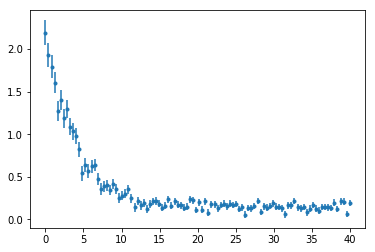

In [14]:
fig = plt.figure('Fitted Data Set')
plt.errorbar(t, N, yerr = N_error, fmt='.')
plt.plot(t,f_line(t,*best_pars),'r')

# Problem 2e

Plot the histogram distributions of the three fit parameters.

Text(0.5, 0, 'p2')

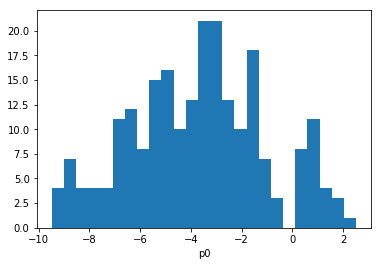

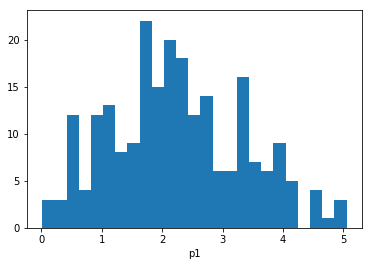

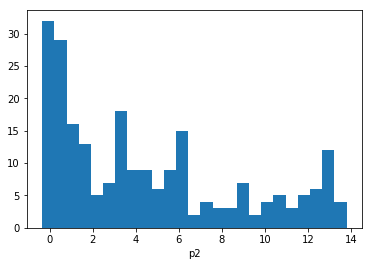

In [15]:
ps = np.array(par_list)

fig1 = plt.figure(1)
plt.hist(ps[:,0], bins=25)
plt.xlabel("p0")

fig2 = plt.figure(2)
plt.hist(ps[:,1], bins=25)
plt.xlabel("p1")

fig3=plt.figure(3)
plt.hist(ps[:,2], bins=25)
plt.xlabel("p2")